# 0.0 Random forest theory

Steps of the algorithm:  
1. We are creating new dataset with the same number of samples as original one, but we using random chosing with replacement. The process of creating new dataset is called bootstrapped.   
2. We will train a decision tree on each of bootstrapped datasets independently. What is more important we won't use every feature for training the threes. We combine some features. 
3. After creating decision trees we can make prediction. We put sample in all trees and waiting for results of all of them. As it's a classification problem we will take the majority voting. The process of combining results from multiple models is called aggregation.  
**What is a Bagging?**  
It is a name of process which contain bootstrapping and aggregating  
**Why we using bootstrapping?**  
Bootstrapping ensures that we are not using the same data for every tree, thanks to that our model is less sensitive for changing data.   
**Why we use feature selection?**  
Random features selection helps to reduce the correlation between the threes.  
**What is ideal size fo the feature subset?**   
We should use values close to the log and sqrt of the total number of features   
**What are out-of-bag samples?**  
Samples which weren't selected at all  
**How many trees I need?**  
Start with a small forest like: 100 trees and then increase amount of thress while monitoring Oout of Bag error. OOB can replace cross-validation. 

  
At each split, only a random subset of features is considered to further introduce randomness.  
Each tree is trained independently on a different bootstrapped sample.  
For classification, the final prediction is made by **majority voting** from all tress.  
For regression, the final prediction is **the avreage** of all three predictions.  

to robimy na dzini tamto na enttropi ale ot nei znaczy ze entropia dziala tylko na drzewie. Nalezy pamietac o buggingu i komitet drzew decyzyjnych nie jest lasem losowym. Wielkosc lasu oparta o blad OOB. Wiec musi byc losowy wybor cech na wezlach i w ten sposob jest las losowy. Sa nadal dwie klasy bo sa klasyfikatory binarne ale maja iles ksiezycy na klase tym sa wielomodowe. Jesli braki to zuuzpelnic. PRzy lasie nie trzeba normalizowac. Na 5 jak wielkosc lasu wplywa na szybkosc inferencji scikit learn i wlasnej implementacji. To trzeba zrobic kilka razy bo windows defender itp. 

Wspolczynnik Gini Impurity Index mierzy prawdopodobienstwo blednej decyzji. 

Czyli prawdopodobienstwo etykiety * prawdopobienstwo pomylki czyli szansa na inn etykiety. 

Czyli suma po i: p_i*(1-p_i) to inaczej po przeksztalceniu i podniesieniu do kwadratu mamy ze to jest 1-suma_i p_i^2

Jesli mamy zdarzenie pewne to gini wtedy wynosi 0. 

G_max odnosi sie do liczby klas wiec jesli mamy 2 kklasy to max wspl Gini wyniesie 0,5.

Redukcja Gini 

bias vs variance tradeoff. Czyli albo agresywnie dopasowany i ingornuje ogół albo ogolnie dopasoany z wieksza wariancja ale mniejszym biasem. Komitet pozwala na redukcje wariancji, nie zwieksza on biasu. Przy glosowaniu wariancje sie znosza. Kazdy model w komitecie nalezy uczyć na osobnych podzbiorach. Boosting -- kolejne modele uczymy na zbiorze wazonym błędem poprzednich. Blad w ktoryms momencie bedzie tak niski ze nie ma sensu rozwijac. 
Druga metoda to bagging lub inaczej bootstrap aggregating. W kroku pierwszym losujemy ze zwracaniem!!!! n probek z N elementowego zbioru i robimy tak dla kazdego z B podzbiorow. Dla kazdego worka wrzucamy n probek i losujemy. Krok drugi dla kazdego z B zbiorow uczymy osobny model. Mechanika ostatniej predykcji jesli to jest regresja to f(x)= 1/ liczba podzbiorow z sumy tych zbiorow f_b(x)
jesli to klasyfikacja a nie regresja to po prostu bierzemy dominante. Bład OOB (out of bag) kazdemu naucznonemu modelowi, dopelnieniem to co nie weszlo do worka jest zbior walidacyjny wiec kazdy ma swoj zbior walidacyjny. Ten blad sie wyplaszczy dla jakiejs liczby modeli. To moze byc komitet SVM, regresjii logistycznej i mozemy miec tez komitet drzew. Okazuje sie ze komitet mocnych modeli jest problematyczny, boosting jeszcze daje rade ale szybko dokladnie modelu malo daje a wariancja sie malo znosi bo niewielka liczba modeli. zamiast budowac komitet z ekspertow budujemy z idiotow. Przy sieciach ciezko stwierdzic czy slaby czy mocny. Przy drzewie mozemy robic 2 rzeczy dosc bezkarnie. Jak zrobic kiepskie drzewo? Drzewo losowowe ma ograniczoną glebokosc np. 1 lub 2. A wewnatrz drzewa dla kazdego węzła losujemy dopuszczalne cechy, tj dla klasyfikacji pierwiastek z ilosci cech, do regresji losujemy D/3. Po prostu taka wartosc. Drzewa decyzyjne sa zbyt mocne zeby z nich robic las losowy. Zanim zrobi podzial sprawdza z czzego moze go zrobic, bo zasada dzialania ta sama. Dla kazdego drzewa pilnowac na czym uczylismy drzewa. Latwiej zazwyczaj trzymac probki walidacyjne.

# 1.0 Generating datasets

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

RANDOM_STATE = 254687
N_SAMPLES = 2587
N_FEATURES = 2
N_CLASSES = 2

class SyntheticDataset:
    """A class to generate and preprocess synthetic datasets for classification task."""

    def __init__(self, random_state: int, n_samples: int, n_features: int, n_classes: int, n_informative: int = N_FEATURES, n_clusters_per_class: int = 1, class_sep: float = 1):
        """
        Initialize the SyntheticDataset class.

        :param random_state: Seed for random number generation.
        :param n_samples: Number of samples to generate.
        :param n_features: Number of features for the dataset.
        :param n_classess: Number of classes for the target variable.
        """
        self.random_state = random_state
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes
        self.n_clusters_per_class = n_clusters_per_class
        self.class_sep = class_sep
        self.n_informative = n_informative
        self.X = None
        self.y = None
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None


    def generate_make_classification(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_classification
        
        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_classification(
            n_samples=self.n_samples,
            n_features=self.n_features,
            n_informative=self.n_informative,
            n_redundant=0,
            n_clusters_per_class=self.n_clusters_per_class, # single-mod means one cluster per class
            random_state=self.random_state,
            class_sep=self.class_sep
            
        )
        return self.X, self.y
    
    def generate_make_moons(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_mmons

        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_moons(
            n_samples=self.n_samples,
            random_state=self.random_state,
        )
        return self.X, self.y

    def normalize(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Normalize the feature matrix (X) and target vector(y) to the range [0,1].

        :return: A tuple containing the normalized feature matrix (X) and target vector (y)
 
        Note: 
        Remmber to fit only on training dataset so it means that I use min and max scaler on training dataset and
        then aplly this boudaries for test dataset. 
               """
        if self.X_train is not None and self.X_test is not None:
            min_x, max_x = self.X_train.min(), self.X_train.max() # Min, max taking only from training dataset
            self.X_train = (self.X_train - min_x) / (max_x - min_x)
            self.X_test = (self.X_test - min_x) / (max_x - min_x)

        return self.X_train, self.X_test 


    def visualize(self): 
        """ Visualize the dataset using a scatter plot"""
        if self.X is not None and self.y is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X[:,0], y=self.X[:,1], hue=self.y)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")


    
    def splitting(self) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Function for splitting datasets into training and test"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=RANDOM_STATE)
        return self.X_train, self.X_test, self.y_train, self.y_test


# 1.1 Analyzes implementation

In [23]:
class ResultsAnalyzes:
    """ 
    A class to analyze and visualize the results of a binary classification model.

    Parameters:
        target (np.ndarray): The true labels.
        prediction (np.ndarray): The predicted labels.
    """

    def __init__(self, target: np.ndarray, prediction: np.ndarray):
        self.target = target
        self.prediction = prediction
        self._accuracy = None # Private atribute
        self._sensitivity = None
        self._specificity = None
        self._precision = None
        self._false_match_rate = None
        self._false_non_match_rate = None

    def confusion_matrix(self, ax=None, title="Confusion_matrix"):
        """
        Compute and plot the confusion matrix 
        
        Notes:
            gca() stands for "get current axes". If no axes exists it creates one automatically. 
        """
        cm = confusion_matrix(self.target, self.prediction)

        if ax is None:
            # Plot the confusion matrix using Seaborn
            plt.figure(figsize=(6,4))
            ax = plt.gca()

        sns.heatmap(
            cm, 
            annot=True, # Displays the value in each cell
            fmt="d", # Format the values as integers
            cmap="Blues", # uses a blue color palette 
            cbar=False, # Hide the color bar
            xticklabels=["Predcited 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"],
            ax=ax
        )
        
        
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")
        ax.set_title(title)
        
        if ax is None:
            plt.show()

    @property 
    def accuracy(self) -> float:
        """ 
        Compute the accuracy of the predictions.
        
        Notes:
            Tells how many samples were well classified from all samples
        """
        return accuracy_score(self.target, self.prediction) 

    @property
    def sensitivity(self) -> float: 
        """ 
        Compute the sensivitty (recall) of the predictions. Sensitivity (Recall) = TP / (TP + FN) 
        
        Notes:
            Tell how many samples were predicted as True Positive from all Acutal Positive
        """
        
        return recall_score(self.target, self.prediction)

    @property
    def specificity(self) -> float: 
        """
        Compute the specificity of the predictions.  Specificity = TN / (TN + FP)

        Notes:
            Tell how many samples were predicted as True Negatives from all Acutal Negative
        """
        
        cm = confusion_matrix(self.target, self.prediction)
        self.tn, self.fp, self.fn, self.tp = cm.ravel() # ravel function in numpy is used to faltten a multi-dimensional array into a 1-dimensional array. It returns a contiguous flattened array, meaning it 
        # collapses the array into a single dimension while maintaining the order of the elements 
        specificity = self.tn / (self.tn + self.fp)
        return specificity
    
    @property
    def balanced_accuracy(self) -> float:
        """
        Compute class imbalance by giving equal weight to both classes.

        Notes:  
         Useful when:
        - Model detects one class better than the other
        - Dataset has unequal class distribution

        !!!! high BA doesn't reveal if the model beats majority-class guessing
        example: in a 90% majority classs, BA = 0.9 could mean the model just predicts the majority that's why we need J score

        **Interpretation:**  
        - 1 = Perfect classifier  
        - 0.5 = Random guessing  
        
        """
        return (self.sensitivity + self.specificity) / 2
    
    @property
    def j_score(self) -> float:
        """
        Measures how much better the model is than random chance. Penalizes models that rely on class imbalance. 

        Notes:
        baseline = 0 means no better than guessing
        J = 0.6 means the model is 60% better than random
        J = -1 means always wrong
        J = 1 means perfect
        """
        return self.sensitivity + self.specificity - 1
    

    @property
    def f1_score(self) -> float:
        """
        Is a critical metric for evaluating classification models, especially when dealing with imbalanced datasets. 
        Penalizes models that ignore the minority class
        Use case: 
        Ideal for fraud detecion, disease screening:
        * In fraud detection: it answers: "Are we catching enough fraud without overwhelming our team?
        * In disease screening "Are we diagnosing patients early without causing unnecessary panic?
        """
        return f1_score(self.target, self.prediction)
    

    @property
    def false_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking an impostor for a legitimate user.
        
        Notes:
        Lower FMR → Stricter system (fewer impostors accepted, but more legitimate users rejected).
        A bank vault prioritizes low FMR (avoid impostors) → High FNMR is tolerated (owners may retry).
        """
        return self.fp / (self.fp + self.tn)
    

    @property
    def false_non_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking a legitimate user for an impostor. \
        
        Notes:
        A office door prioritizes low FNMR (avoid frustrating employees) → Higher FMR risk.       
        """
        return self.fn / (self.fn + self.tp)
    

    def show_results(self):
        """ Display the accuracy, sensitivity and specificity of the predictions"""
        #self.accuracy = self._accuracy()
        #self.sensitivity = self._sensitivity()
        #self.specificity = self._specificity()
        print(f"Accuracy: {self.accuracy:.2f}, Sensivity: {self.sensitivity:.2f}, Specifity: {self.specificity:.2f}")

    
    def plot_ROC_curve(self, y_prediction_probability: np.ndarray, ax=None, title="ROC curve"):
        """
        Plot the Receiver Operaint Characteristic (ROC) curve.
        
        Parameters:
            y_prediction_probability (np.ndarray): The predicted probabilities for the positive class.
        """
        # Compute ORC curve and AUC
        fpr, tpr, thresholds = roc_curve(self.target, y_prediction_probability) # stands for False Positive Rate (1 - Specificity)  and True Positive Rate (Sensitivity)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        if ax is None:
            plt.figure(figsize=(8,6))
            ax = plt.gca()
        ax.plot(fpr, tpr, color="blue", lw=2, label=f"ROC cruve (AUC = {roc_auc:.2f})")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(title)
        ax.legend(loc="lower right")
        
        if ax is None:
            plt.show()

        def plot_decision_boundary(self, X: np.ndarray, y: np.ndarray):
            """
            Plot the decision boundary for a trained model.
            
            Parameters:
                X (np.ndarray): The feature matrix of shape (n_samples,n_features)
                y (np.ndarray): The target vector of shape (n_samples,).
            """

            if X.shape[1] != 2:
                raise ValueError("Decision boundary plotting is only supported for 2D feature spaces.")
            
            # Create a grid of points covering the feature space
            x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 # Frist feature
            y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 # Second feature

# 2.0 Implementation of decision tree

In [24]:
from typing import Optional, Union, Dict, Tuple, Any

class Node():

    """A node in a decision tree."""
    def __init__(
        self,
        *, 
        feature_index: Optional[int] = None,
        threshold : Optional[Union[float, int]] = None,
        left: Optional['Node'] = None, 
        right: Optional['Node'] = None, 
        info_gain: Optional[float] = None, 
        value: Optional[Union[float, int]] = None):

        """ Initialize a decision tree.
        Args:
            feature_index: Index of the feature used for splitting
            threshold: threshold value for the feature split.
            left: Left child node.
            right: Right child node.
            info_gain: Information gain from the split.
            value: Predicted value if this is a leaf node.
        """

        # Split atributes
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right 
        self.info_gain = info_gain
        
        # Leaf atributes
        self.value = value
        self.class_distribution = None # For probability estimates
        self.leaf_classes = None
        

class DecisionTree():
    """ A decision tree classifier.
    
    Attributes: 
        root: The root node of the decision tree.
        max_depth: Maximum depth of the tree.
        min_samples_split: Minimum number of samples required to split a node.
    """

    def __init__(self, max_depth: int, min_samples_split: int = 2) -> None:
        """Initialize the decision tree with stopping condtinions
        
        Args:
            max_depth: Maximum depth the tree can grow.
            min_samples_split: Minimum samples needed to split a Node. Defaults to 2.
        """
        self.root: Optional[Node] = None
        self.max_depth: int = max_depth
        self.min_samples_split: int = min_samples_split


    def build_tree(self, dataset: np.ndarray, current_depth: int = 0) -> Node:
        """Recursively builds the decision tree.
        
        Args: 
            dataset: The numpy array of samples
            current_depth: Current depth in the three. Defaults to 0.
        
        Returns:
            Node: The root node of the constructed subtree.

        Notes: 
            Why we are checking > 0 ?. Because when info_gain = 0, it means splitting the node didn't improve class separation, this happens in two
            scenarios:
                - all samples already belong to the same class (pure node)
                - the split didn't separate classes better than the parent node
            Pay attention that thanks to recursive there all left subtrees will be done and ther all right
        """
        X, y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # Check stopping conditions
        if num_samples >= self.min_samples_split and (self.max_depth is None or current_depth <= self.max_depth):
            
            best_split = self.get_best_split(dataset, num_samples, num_features)
            
            if best_split["info_gain"] > 0: 

                left_subtree = self.build_tree(best_split["dataset_left"], current_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], current_depth + 1)
                return Node(
                    feature_index=best_split["feature_index"],
                    threshold=best_split["threshold"],
                    left=left_subtree, 
                    right=right_subtree, 
                    info_gain=best_split["info_gain"]
                )
            
        leaf_value = self.calculate_leaf_value(y)
        
        # Creating leaf node
        node = Node(value=leaf_value)

        # Store class distribution
        classes, counts = np.unique(y, return_counts=True)
        node.class_distribution = counts / counts.sum()
        node.leaf_classes = classes 

        # if self.classes_ doesn't exists (first leaf) initializes it with the classes found in this leaf 
        # if self.classes_ exists combines existing classes with new ones from this leaf, unique values to avoid duplicates
        self.classes_ = np.unique(np.concatenate([self.classes_, classes])) if hasattr(self, 'classes_') else classes

        return node
    
    
    def get_best_split(self, dataset: np.ndarray, num_samples: int, num_features: int) -> Dict[str, Any]:
        """Find the optimal split for a dataset using a information gain.
        
        Args:
            dataset: Input data
            num_samples: Number of samples in the dataset
            num_features: Number of features in the dataset

        Returns:
            Dictioniary containing:
                -feature_index: Best feature to split on
                -threshold: Best threshold value
                -dataset_left: Left subset
                -dataset_right: Right subset
                -info_gain: Information gain of this split
        """

        best_split = {
            "feature_index": None,
            "threshold": None,
            "dataset_left": None,
            "dataset_right" : None,
            "info_gain": -float("inf") # Default no gain
            }
            
        max_info_gain = -float("inf") # We wanna maximize information gain

        for feature_index in range (num_features):
            
            feature_values = dataset[:, feature_index]
            possible_tresholds = np.unique(feature_values)

            for threshold in possible_tresholds:

                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:

                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain > max_info_gain:

                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split
    

    def split(self, dataset: np.ndarray, feature_index: int, threshold: float) -> Tuple[np.ndarray, np.ndarray]:
        """Split dataset based on feature treshold.
        
        Args:
            dataset: input data to split.
            feature_index: index of feature to split on
            threshold: Value to split the feature

        Returns:
            Tuple of (left_subtree, right_subtree)
        """
        # dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        # dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])

        feature_column = dataset[:, feature_index]
        dataset_left = dataset[feature_column <= threshold]
        dataset_right = dataset[feature_column > threshold]
        return dataset_left, dataset_right
    

    def information_gain(self, parent: np.ndarray, l_child: np.ndarray, r_child: np.ndarray):
        """Calculates the information gain from a potential split.
        
        Args:
            parent: Parent node target values
            l_child: Left child node target values
            r_child: Right child node target values

        Returns:
            The information gain
        """
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain
    

    def entropy(self, y: np.ndarray):
        """Calculates the entropy of a target value distribution    
        
        Args:
            y: Array of taget values
        
        Returns:
            The computed entropy value.
        """
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities* np.log2(probabilities + 1e-10)) # Added epsilon for numerical stability
        return entropy
    

    def calculate_leaf_value(self, y: np.ndarray) -> Union[int, float]:
        """Determines the prediciton value for a leaf node
        
        Args:
            y: Target values at the leaf node.

        Returns:
            The most frequent class
        """
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]
    
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Builds the decision tree from the training data.
        
        Args:
            X: Training data of shape n_features x n_samples
            y: Target values of shape (n_samples, )

        Raises:
            ValueError: If X and y have incompatible shapes
        """

        if X.shape[0] != y.shape[0]:
            raise ValueError("X and y must have the same number of samples")
        
        self.classes_ = np.unique(y)
        y_reshaped = y.reshape(-1, 1) if y.ndim == 1 else y
        dataset = np.concatenate((X, y_reshaped), axis=1)
        self.root = self.build_tree(dataset)


    def predict(self, X: np.ndarray):
        """Predicts target values for the input features
        
        Args:
            X: Input features of shape (n_samples, n_features)

        Returns:
            Array of predicted values
        """

        if self.root is None:
            raise RuntimeError("The three has not been fitted yet. Call 'fit' first.")
        
        proba = self.predict_proba(X)
        return np.array([self.classes_[np.argmax(p)] for p in proba])

    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Predict class probabilities for samples in X.
        
        Args:
            X: input features of shape (n_samples, n_features)

        Returns:
            Array of probabilities (shape: (n_samples, n_classes))

        """
        if self.root is None:
            raise RuntimeError("The tree has not been fitted yet.")
        
        # Initialize array of zeros
        proba = np.zeros((X.shape[0], len(self.classes_)))

        for i, x in enumerate(X):
            node = self.root

            while True:
                if node.value is not None: # Reached leaf node
                    # Create probability vector aligned with self.classes_
                    leaf_proba = np.zeros(len(self.classes_))
                    if node.class_distribution is not None:
                        for cls, prob in zip(node.leaf_classes, node.class_distribution):
                            class_idx = np.where(self.classes_ == cls)[0][0]
                            leaf_proba[class_idx] = prob
                    proba[i] = leaf_proba
                    break
                feature_val = x[node.feature_index]
                node = node.left if feature_val <= node.threshold else node.right

        return proba


# 3.0 Implementation of random forest

In [25]:
from collections import Counter

class RandomForest:
    """
    Random Forest Classifier.
    
    Notes:
    For each sample Oout-of-bag, the treee predicts its class and the predictions is stored in oob_predictions. After all trees are trained,
    the majority vote of predictions for each OOB sample is compared to its true label to compute OOB error. Example:
    Suppose sample X[5] is OOB for Tree 1, Tree 3, Tree 4 
    oob_predictions[5] stores predictions from these trees: [class_A, class_A, class_B]
    majority vote = class_A -> compared to true label y[5] to check correctness

    oob_predictions aggregates predicitions only from trees where the sample was OOB. 
    Probability of a sample being excluded froom all trees, for large n, is close to zero, almost impossible. 
    Every sample is OOB for circa 37% of trees on average. 

    """

    
    def __init__(
        self,
        n_trees: int = 100,
        max_depth: int =  None,
        min_samples_split: int = 2,
        random_state = RANDOM_STATE
    ):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = None
        self.random_state = random_state
        self.trees = [] 
        self.oob_scores = [] # Store OOB error per tree
        self.oob_predictions = {} # OOB samples
        self.classes_ = None # Underscore after means it estimated from data

    
    def _bootstrap_sample(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """Generate a bootstrap sample and track OOB indices"""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        oob_indices = np.array([i for i in range(n_samples) if i not in indices])
        return X[indices], y[indices], oob_indices
    

    def _get_random_features(self, n_features: int) -> list[int]:
        """Randomly select a subset of features for splitting."""
        max_features = int(np.sqrt(n_features))
        return np.random.choice(n_features, size=max_features, replace=False)
    

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Train the Random Forest."""
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for _ in range(self.n_trees):
            # Bootstrap sample
            X_boot, y_boot, oob_idnices = self._bootstrap_sample(X, y)

            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)

            # Modify get_best_split to use random features
            tree.get_best_split = self._get_best_split_with_random_features(tree)
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)

            # Track OOB
            if len(oob_idnices) > 0: 
                oob_preds = tree.predict(X[oob_idnices])
                for idx, pred in zip(oob_idnices, oob_preds):
                    if idx not in self.oob_predictions:
                        self.oob_predictions[idx] = []
                    self.oob_predictions[idx].append(pred)

        self._compute_oob_error(y)


    def _get_best_split_with_random_features(self, tree: DecisionTree):
        """Wrapper to override 'get_best_split' with random feature selection"""
        def modified_get_best_split(dataset, num_samples, num_features):
            feature_indices = self._get_random_features(num_features)
            
            best_split = {
            "feature_index": None,
            "threshold": None,
            "dataset_left": None,
            "dataset_right" : None,
            "info_gain": -float("inf") # Default no gain
            }
            max_info_gain = -float("inf") # We wanna maximize information gain

            for feature_index in feature_indices:
                
                feature_values = dataset[:, feature_index]
                possible_tresholds = np.unique(feature_values)

                for threshold in possible_tresholds:

                    dataset_left, dataset_right = tree.split(dataset, feature_index, threshold)
                    if len(dataset_left) > 0 and len(dataset_right) > 0:

                        y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                        curr_info_gain = tree.information_gain(y, left_y, right_y)
                        if curr_info_gain > max_info_gain:

                            best_split["feature_index"] = feature_index
                            best_split["threshold"] = threshold
                            best_split["dataset_left"] = dataset_left
                            best_split["dataset_right"] = dataset_right
                            best_split["info_gain"] = curr_info_gain
                            max_info_gain = curr_info_gain

            return best_split
        return modified_get_best_split


    def _compute_oob_error(self, y_true: np.ndarray) -> float:
        """Calculate OOb error from aggregated predictions."""
        oob_count = 0
        correct = 0

        for idx, preds in self.oob_predictions.items():
            if len(preds) > 0:
                majority_vote = Counter(preds).most_common(1)[0][0] # Most_common(1) returns the most frequent class and its count, [0][0] extract class label
                if majority_vote == y_true[idx]:
                    correct += 1
                oob_count += 1
        
        self.oob_error = 1 - (correct / oob_count) if oob_count > 0 else 0.0
        return self.oob_error
    

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict by majority voting across all trees."""
        all_pred = np.array([tree.predict(X) for tree in self.trees])
        return np.array([Counter(all_pred[:, i]).most_common(1)[0][0] for i in range (X.shape[0])])
    
    
    def predict_proba(self, X:np.ndarray) -> np.ndarray:
        """Predict class probabilitites (averaged across trees.)"""
        proba = np.zeros((X.shape[0], len(self.classes_)))
        for tree in self.trees:
            proba += tree.predict_proba(X)
        return proba / self.n_trees

# 4.0 Synthetic datasets

## 4.1 Make classification

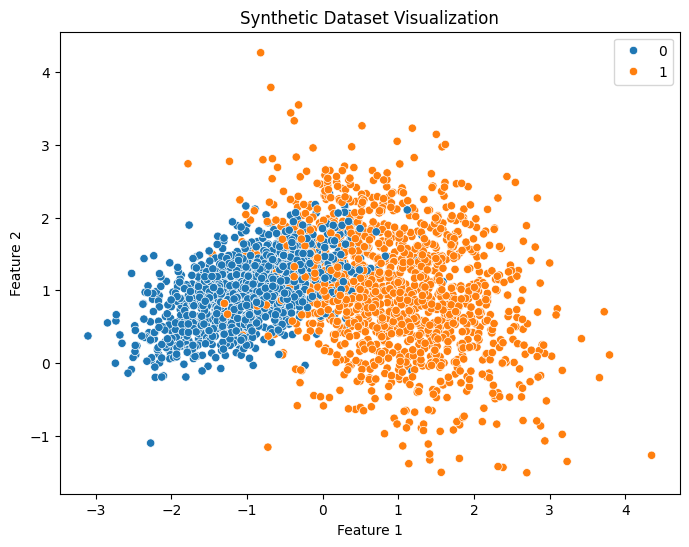

Own Algorithm took 40.12 sec
Sklearn Algorithm took 0.75 sec


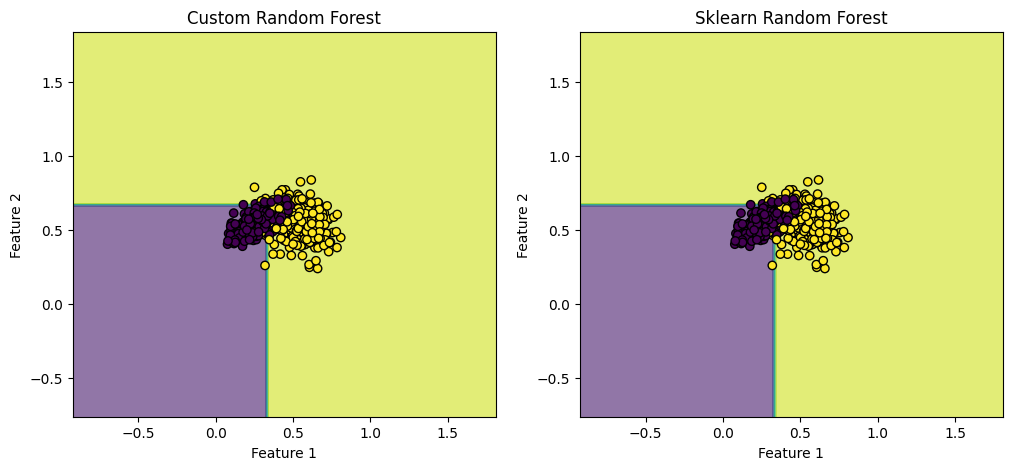

Own implementation results:
Accuracy: 0.90, Sensivity: 0.91, Specifity: 0.89
Sklearn implementation results:
Accuracy: 0.90, Sensivity: 0.92, Specifity: 0.89


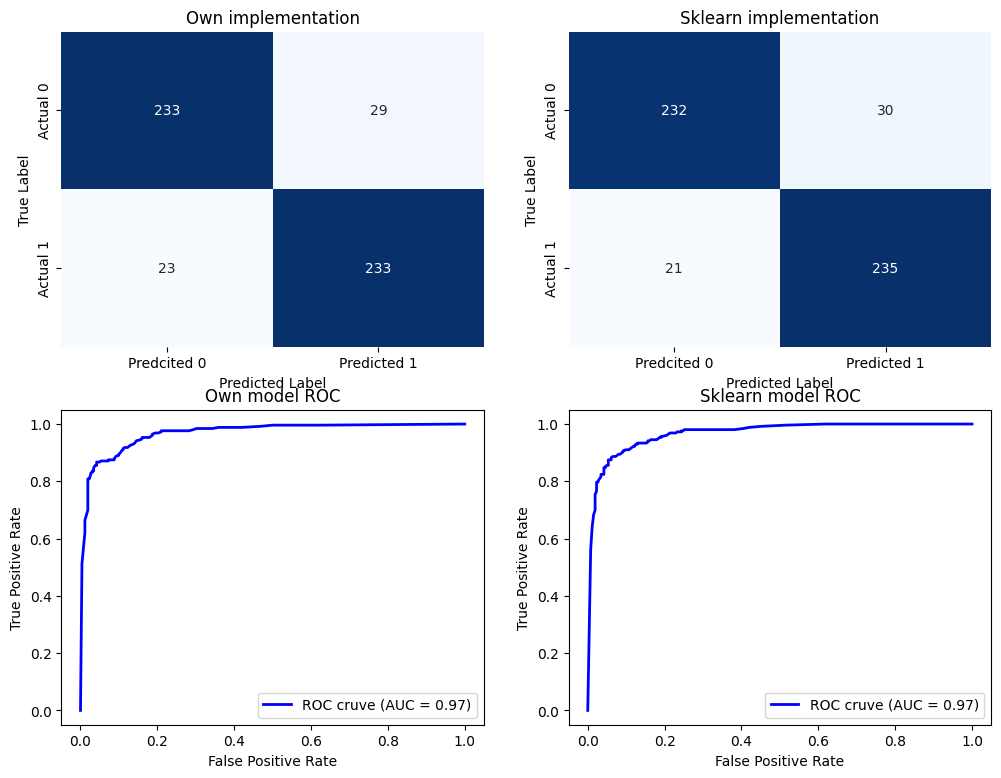

In [26]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib.gridspec import GridSpec


dataset = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES, N_FEATURES)
dataset.generate_make_classification() 
dataset.visualize()

# Dividing dataset on a trening set and test set 
dataset.splitting()

# Normalization of datasets 
dataset.normalize()


# Fitting models
sklearn_random_forest_clf = RandomForestClassifier()
sklearn_random_forest_clf.fit(dataset.X_train, dataset.y_train)

random_forest_clf = RandomForest()
random_forest_clf.fit(dataset.X_train, dataset.y_train)

# Own algorithm 
start_time = time.time()
for _ in range(100):
    y_pred = random_forest_clf.predict(dataset.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Own Algorithm took {elapsed_time:.2f} sec")
y_proba = random_forest_clf.predict_proba(dataset.X_test)[:, 1]

# Sklearn algorithm
start_time = time.time()
for _ in range(100):
    y_pred_sklearn = sklearn_random_forest_clf.predict(dataset.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Sklearn Algorithm took {elapsed_time:.2f} sec")
y_proba_sklearn = sklearn_random_forest_clf.predict_proba(dataset.X_test)[:, 1]


# Range of features
x_min, x_max = dataset.X_test[:,0].min() - 1, dataset.X_test[:,0].max() + 1 
y_min, y_max = dataset.X_test[:,1].min() - 1, dataset.X_test[:,1].max() + 1

# Creating mesh grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten a mesh grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Prediction for every point of the grid, own algorithm
Z = random_forest_clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# Prediction for every point of the grid, sklearn algorithm
Z_sklearn = sklearn_random_forest_clf.predict(grid_points)
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

# Plot own Random Forest
ax1 = fig.add_subplot(gs[0, 0])
contour1 = ax1.contourf(xx, yy, Z, cmap="viridis", alpha=0.6)
scatter1 = ax1.scatter(dataset.X_test[:, 0], dataset.X_test[:, 1], c=dataset.y_test, cmap="viridis", edgecolor='k')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_title("Custom Random Forest")

# Plot sklearn random forest
ax2 = fig.add_subplot(gs[0, 1])
contour2 = ax2.contourf(xx, yy, Z_sklearn, cmap="viridis", alpha=0.6)
scatter2 = ax2.scatter(dataset.X_test[:, 0], dataset.X_test[:, 1], c=dataset.y_test, cmap="viridis", edgecolor='k')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_title("Sklearn Random Forest")

plt.show()


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,9))

# Own analyzer
analyzer = ResultsAnalyzes(dataset.y_test, y_pred)
print("Own implementation results:")
analyzer.show_results()
analyzer.confusion_matrix(ax=ax1, title="Own implementation")
analyzer.plot_ROC_curve(y_proba, ax=ax3, title="Own model ROC")

# Sklearn analyzer
analyzer_sklearn = ResultsAnalyzes(dataset.y_test, y_pred_sklearn)
print("Sklearn implementation results:")
analyzer_sklearn.show_results()
analyzer_sklearn.confusion_matrix(ax=ax2, title="Sklearn implementation")
analyzer_sklearn.plot_ROC_curve(y_proba_sklearn, ax=ax4, title="Sklearn model ROC")

## 4.2. Make moons

Own Algorithm took 42.53 sec
Sklearn Algorithm took 0.58 sec


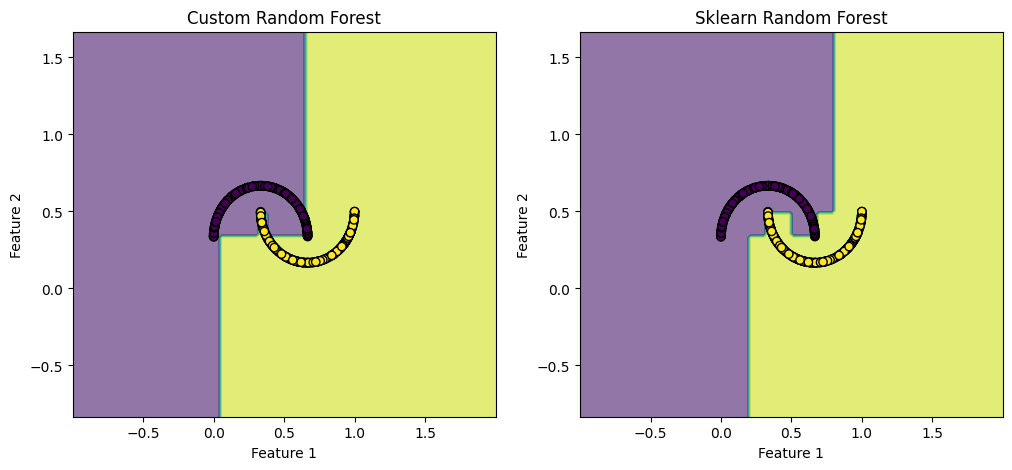

Own implementation results:
Accuracy: 1.00, Sensivity: 1.00, Specifity: 1.00
Sklearn implementation results:
Accuracy: 1.00, Sensivity: 1.00, Specifity: 1.00


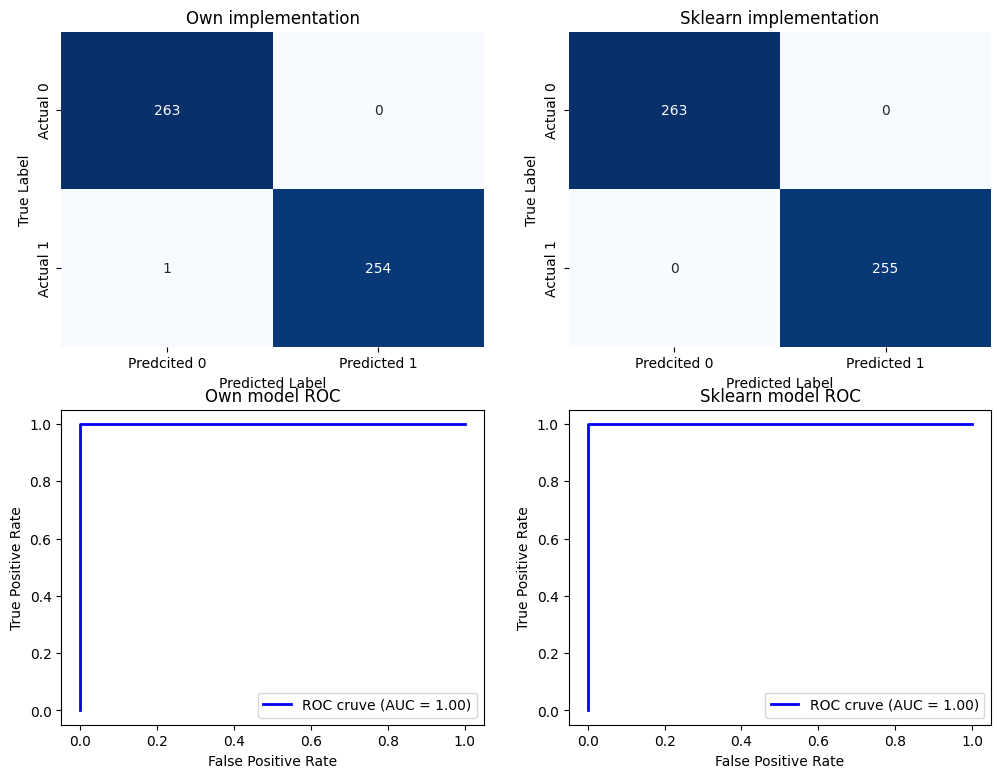

In [29]:
dataset_moons = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES, N_FEATURES)
dataset_moons.generate_make_moons() 

# Dividing dataset on a trening set and test set 
dataset_moons.splitting()

# Normalization of datasets 
dataset_moons.normalize()

# Fitting models
sklearn_random_forest_clf = RandomForestClassifier()
sklearn_random_forest_clf.fit(dataset_moons.X_train, dataset_moons.y_train)

random_forest_clf = RandomForest()
random_forest_clf.fit(dataset_moons.X_train, dataset_moons.y_train)

# Own algorithm 
start_time = time.time()
for _ in range(100):
    y_pred = random_forest_clf.predict(dataset_moons.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Own Algorithm took {elapsed_time:.2f} sec")
y_proba = random_forest_clf.predict_proba(dataset_moons.X_test)[:, 1]

# Sklearn algorithm
start_time = time.time()
for _ in range(100):
    y_pred_sklearn = sklearn_random_forest_clf.predict(dataset_moons.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Sklearn Algorithm took {elapsed_time:.2f} sec")
y_proba_sklearn = sklearn_random_forest_clf.predict_proba(dataset_moons.X_test)[:, 1]


# Range of features
x_min, x_max = dataset_moons.X_test[:,0].min() - 1, dataset_moons.X_test[:,0].max() + 1 
y_min, y_max = dataset_moons.X_test[:,1].min() - 1, dataset_moons.X_test[:,1].max() + 1

# Creating mesh grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten a mesh grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Prediction for every point of the grid, own algorithm
Z = random_forest_clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# Prediction for every point of the grid, sklearn algorithm
Z_sklearn = sklearn_random_forest_clf.predict(grid_points)
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

# Plot own Random Forest
ax1 = fig.add_subplot(gs[0, 0])
contour1 = ax1.contourf(xx, yy, Z, cmap="viridis", alpha=0.6)
scatter1 = ax1.scatter(dataset_moons.X_test[:, 0], dataset_moons.X_test[:, 1], c=dataset_moons.y_test, cmap="viridis", edgecolor='k')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_title("Custom Random Forest")

# Plot sklearn random forest
ax2 = fig.add_subplot(gs[0, 1])
contour2 = ax2.contourf(xx, yy, Z_sklearn, cmap="viridis", alpha=0.6)
scatter2 = ax2.scatter(dataset_moons.X_test[:, 0], dataset_moons.X_test[:, 1], c=dataset_moons.y_test, cmap="viridis", edgecolor='k')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_title("Sklearn Random Forest")

plt.show()


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,9))

# Own analyzer
analyzer = ResultsAnalyzes(dataset_moons.y_test, y_pred)
print("Own implementation results:")
analyzer.show_results()
analyzer.confusion_matrix(ax=ax1, title="Own implementation")
analyzer.plot_ROC_curve(y_proba, ax=ax3, title="Own model ROC")

# Sklearn analyzer
analyzer_sklearn = ResultsAnalyzes(dataset_moons.y_test, y_pred_sklearn)
print("Sklearn implementation results:")
analyzer_sklearn.show_results()
analyzer_sklearn.confusion_matrix(ax=ax2, title="Sklearn implementation")
analyzer_sklearn.plot_ROC_curve(y_proba_sklearn, ax=ax4, title="Sklearn model ROC")

## 4.3. Multimodal dataset

Own Algorithm took 42.67 sec
Sklearn Algorithm took 0.61 sec


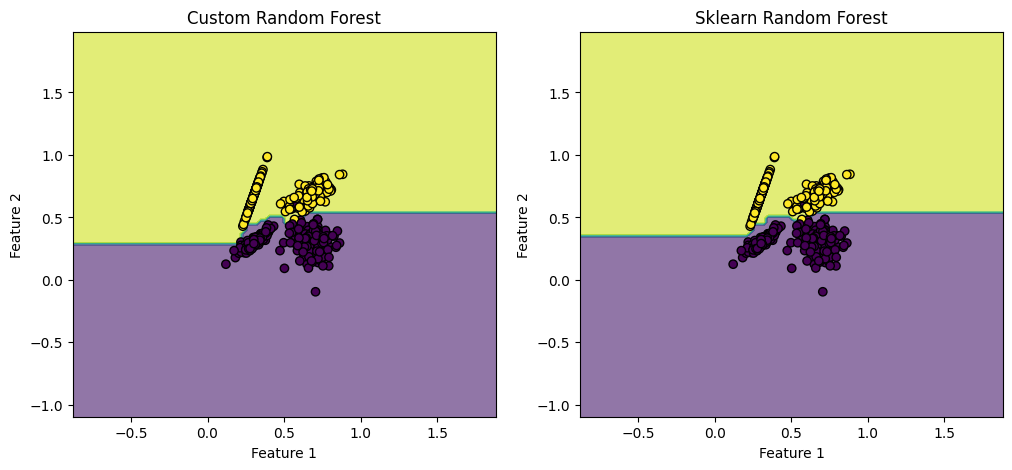

Own implementation results:
Accuracy: 1.00, Sensivity: 1.00, Specifity: 0.99
Sklearn implementation results:
Accuracy: 0.99, Sensivity: 1.00, Specifity: 0.99


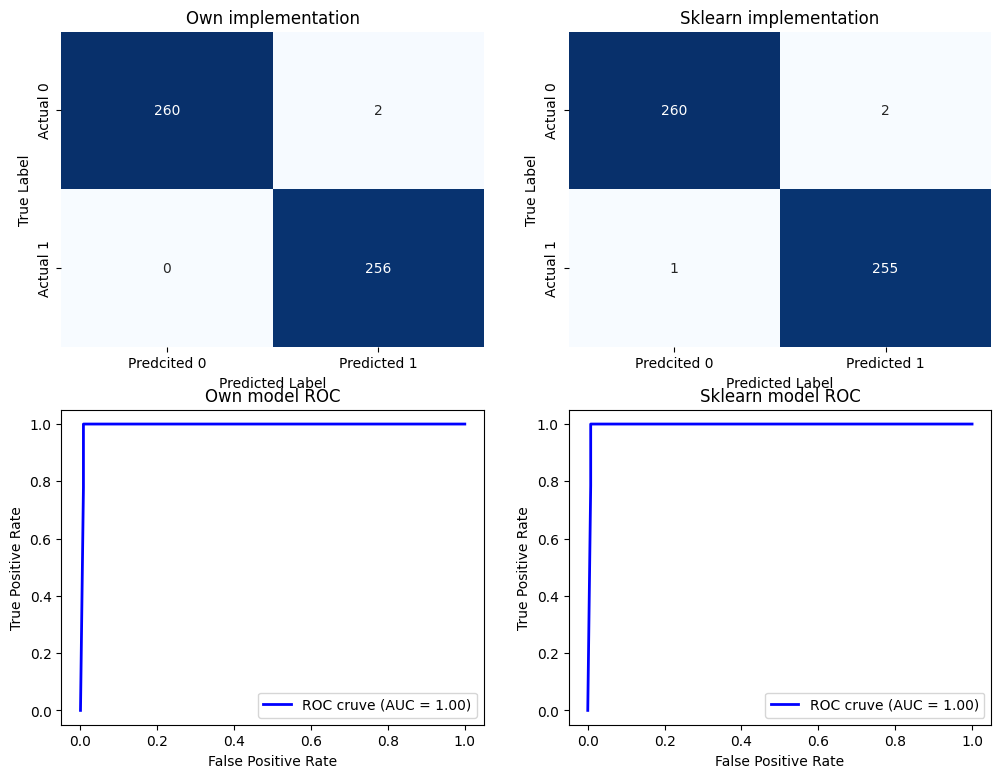

In [30]:
N_CLUSTERS_PER_CLASS = 2
CLASS_SEP = 2.0
N_INFORMATIVE = 2
N_FEATURES = 2
dataset_multimodal = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES, N_INFORMATIVE, N_CLUSTERS_PER_CLASS, CLASS_SEP)
dataset_multimodal.generate_make_classification() 

# Dividing dataset on a trening set and test set 
dataset_multimodal.splitting()

# Normalization of datasets 
dataset_multimodal.normalize()

# Fitting models
sklearn_random_forest_clf = RandomForestClassifier()
sklearn_random_forest_clf.fit(dataset_multimodal.X_train, dataset_multimodal.y_train)

random_forest_clf = RandomForest()
random_forest_clf.fit(dataset_multimodal.X_train, dataset_multimodal.y_train)

# Own algorithm 
start_time = time.time()
for _ in range(100):
    y_pred = random_forest_clf.predict(dataset_multimodal.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Own Algorithm took {elapsed_time:.2f} sec")
y_proba = random_forest_clf.predict_proba(dataset_multimodal.X_test)[:, 1]

# Sklearn algorithm
start_time = time.time()
for _ in range(100):
    y_pred_sklearn = sklearn_random_forest_clf.predict(dataset_multimodal.X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Sklearn Algorithm took {elapsed_time:.2f} sec")
y_proba_sklearn = sklearn_random_forest_clf.predict_proba(dataset_multimodal.X_test)[:, 1]


# Range of features
x_min, x_max = dataset_multimodal.X_test[:,0].min() - 1, dataset_multimodal.X_test[:,0].max() + 1 
y_min, y_max = dataset_multimodal.X_test[:,1].min() - 1, dataset_multimodal.X_test[:,1].max() + 1

# Creating mesh grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten a mesh grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Prediction for every point of the grid, own algorithm
Z = random_forest_clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# Prediction for every point of the grid, sklearn algorithm
Z_sklearn = sklearn_random_forest_clf.predict(grid_points)
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, figure=fig)

# Plot own Random Forest
ax1 = fig.add_subplot(gs[0, 0])
contour1 = ax1.contourf(xx, yy, Z, cmap="viridis", alpha=0.6)
scatter1 = ax1.scatter(dataset_multimodal.X_test[:, 0], dataset_multimodal.X_test[:, 1], c=dataset_multimodal.y_test, cmap="viridis", edgecolor='k')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_title("Custom Random Forest")

# Plot sklearn random forest
ax2 = fig.add_subplot(gs[0, 1])
contour2 = ax2.contourf(xx, yy, Z_sklearn, cmap="viridis", alpha=0.6)
scatter2 = ax2.scatter(dataset_multimodal.X_test[:, 0], dataset_multimodal.X_test[:, 1], c=dataset_multimodal.y_test, cmap="viridis", edgecolor='k')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_title("Sklearn Random Forest")

plt.show()


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,9))

# Own analyzer
analyzer = ResultsAnalyzes(dataset_multimodal.y_test, y_pred)
print("Own implementation results:")
analyzer.show_results()
analyzer.confusion_matrix(ax=ax1, title="Own implementation")
analyzer.plot_ROC_curve(y_proba, ax=ax3, title="Own model ROC")

# Sklearn analyzer
analyzer_sklearn = ResultsAnalyzes(dataset_multimodal.y_test, y_pred_sklearn)
print("Sklearn implementation results:")
analyzer_sklearn.show_results()
analyzer_sklearn.confusion_matrix(ax=ax2, title="Sklearn implementation")
analyzer_sklearn.plot_ROC_curve(y_proba_sklearn, ax=ax4, title="Sklearn model ROC")